In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

In [3]:
digits = datasets.load_digits()

In [4]:
X = digits.data
y = digits.target

In [6]:
svc = svm.SVC(kernel = 'linear')
C_s = np.logspace(-10, 0, 10)

In [7]:
scores = list()
scores_std = list()

In [8]:
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs = 1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

In [9]:
import matplotlib.pyplot as plt

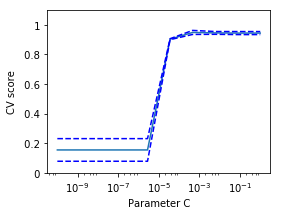

In [16]:
plt.figure(1, figsize = (4,3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "% g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()


In [17]:
from sklearn import linear_model, datasets

In [18]:
lasso = linear_model.LassoCV()

In [19]:
diabetes = datasets.load_diabetes()

In [20]:
X_diabetes = diabetes.data
y_diabetes = diabetes.target

In [21]:
lasso.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [22]:
lasso.alpha_

0.012291895087486173

### 2017.12 review

In [2]:
boston = datasets.load_boston()

In [3]:
X = boston.data

In [4]:
y = boston.target

In [6]:
X[:3]

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   7.18500000e+00,
          6.11000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.92830000e+02,
          4.03000000e+00]])

In [7]:
import pandas as pd

In [9]:
pd.DataFrame(X).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [10]:
y[:3]

array([ 24. ,  21.6,  34.7])

In [16]:
from sklearn.decomposition import PCA

In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_scaled = StandardScaler().fit_transform(X)

In [15]:
pd.DataFrame(X_scaled).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727


In [19]:
# pca, n_components=2
pca = PCA(n_components=3)

In [20]:
pca.fit_transform(X_scaled)

array([[-2.09784245,  0.7771017 ,  0.33507618],
       [-1.45641223,  0.58808833, -0.70134048],
       [-2.07415237,  0.60218543,  0.16123374],
       ..., 
       [-0.31101606,  1.15182721, -0.41645927],
       [-0.26916176,  1.03671761, -0.59260478],
       [-0.1242658 ,  0.75197455, -1.30005539]])

In [22]:
pca = PCA()
X_scaled_pca = pca.fit_transform(X_scaled)

In [23]:
pd.DataFrame(X_scaled_pca).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.097842,0.777102,0.335076,-0.887908,0.423296,0.330683,0.314569,0.290729,-0.426076,0.640962,-0.031804,0.018611,0.365765
1,-1.456412,0.588088,-0.701340,-0.485250,-0.198620,-0.241806,0.560680,-0.228066,-0.165641,0.085708,-0.640760,-0.124917,-0.071019
2,-2.074152,0.602185,0.161234,-0.739457,-0.935727,-0.425675,0.501714,0.102905,0.069197,-0.179810,-0.487040,0.134511,-0.014190


In [24]:
v = pca.explained_variance_ratio_


In [25]:
v

array([ 0.47097344,  0.11015872,  0.09547408,  0.06598453,  0.0641974 ,
        0.05074235,  0.04146288,  0.0305034 ,  0.02134115,  0.01694306,
        0.0143203 ,  0.01301288,  0.00488581])

In [26]:

np.cumsum(v)

array([ 0.47097344,  0.58113216,  0.67660624,  0.74259077,  0.80678817,
        0.85753052,  0.8989934 ,  0.9294968 ,  0.95083795,  0.96778101,
        0.98210131,  0.99511419,  1.        ])

In [27]:
np.argmax(np.cumsum(v)>0.95)

8

In [28]:
n_comps = 1 + np.argmax(np.cumsum(v)>0.95)

In [29]:
# 使用SVR回归
from sklearn.svm import SVR

In [34]:
rer = SVR(kernel='linear')

In [35]:
rer.fit(X_scaled, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
cross_val_score(rer, X_scaled, y, cv=3)

array([ 0.70141604,  0.34659745, -0.07987608])

In [38]:
np.ndim(X_scaled)

2

In [39]:
np.shape(X_scaled)

(506, 13)

In [40]:
rer.coef_

array([[-1.21319979,  0.84345615,  0.06548744,  0.31229072, -0.97882102,
         3.6337196 , -0.77149358, -2.10727095,  1.50530124, -1.67218758,
        -1.61863115,  1.02417814, -2.20693167]])

In [41]:
rer.fit(X_scaled[:,:5], y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
cross_val_score(rer, X_scaled, y, cv=5)

array([ 0.76738438,  0.72148627,  0.54550725,  0.13942812,  0.06659254])

In [44]:
rer.coef_

array([[-1.93881921,  1.68243379, -1.54244264,  1.12236095, -1.33933311]])

In [45]:
# 使用gridsearchCV选择参数

In [47]:
from sklearn.model_selection import GridSearchCV
parms = {'C': [1, 10, 100, 1000], 'gamma': [1e-3, 1e-4, 1e-5]}

In [48]:
clf = GridSearchCV(SVR(), parms, cv=5, scoring='neg_mean_squared_error')

In [49]:
clf.fit(X_scaled[:,:5], y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [50]:
clf.best_score_

-64.1217760325694

In [51]:
clf.best_params_

{'C': 100, 'gamma': 0.001}

In [52]:
clf.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [54]:
clf.score(X_scaled[:,:5], y)

-60.310161300837372

In [57]:
clf.predict(X_scaled[:10,:5])

array([ 24.01714286,  22.51462424,  22.51462919,  23.75353438,
        23.74449467,  23.7541555 ,  22.51572637,  22.50176456,
        22.48521997,  22.49544023])

In [58]:
y[:10]

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,  18.9])

In [62]:
pd.DataFrame(clf.predict(X_scaled[:10,:5]),y[:10]).reset_index()

,index,0
0,24.0,24.017143
1,21.6,22.514624
2,34.7,22.514629
3,33.4,23.753534
4,36.2,23.744495
5,28.7,23.754155
6,22.9,22.515726
7,27.1,22.501765
8,16.5,22.485220
9,18.9,22.495440


In [63]:
# 使用树回归
from sklearn.tree import DecisionTreeRegressor

In [64]:
tree_rer = DecisionTreeRegressor()

In [65]:
parms = {'max_depth' :[1,2,3,4,5]} 

In [69]:
clf_tree = GridSearchCV(tree_rer, parms, cv = 5, scoring='neg_mean_squared_error')

In [70]:
clf_tree.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [71]:
clf_tree.best_score_

-36.246456415128812

In [72]:
clf_tree.best_params_

{'max_depth': 3}

In [73]:
clf_tree.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [76]:
clf_tree.predict(X[:10])

array([ 22.9052    ,  22.9052    ,  33.34883721,  33.34883721,
        33.34883721,  22.9052    ,  22.9052    ,  18.12352941,
        18.12352941,  18.12352941])

In [77]:
y[:10]

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,  18.9])